In [65]:
### Extra code to reuse

## Exporting data to CSV
# combined_data.to_csv('file_name.csv')

## Finding what the Data Type a column is.
# data_type = IMDb_Basics['isAdult'].dtype
# print(data_type)

## Filtering dataframes for a specific values
# filtered_df = IMDB_Basics[IMDB_Basics['primaryTitle'].str.contains('Bond', case=False, na=False)]
# print(filtered_df)

# Optionally save the combined dataframe to a new CSV file
# output_file = path_to_files + 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)
# print(f"Combined CSV saved to {output_file}")

# Code to troubleshoot date columns

# 1. Check for NaT values:
# If you used errors='coerce' during the conversion, you can check for NaT values, which would indicate conversion failures.
# nat_counts = all_stocks['Date'].isna().sum()
# print(f"Number of NaT values in 'Date': {nat_counts}")

# 2. Check the range of dates:
# Look at the minimum and maximum values to ensure they are within expected bounds.
# print("Earliest date:", all_stocks['Date'].min())
# print("Latest date:", all_stocks['Date'].max())

# 3. Sample random dates:
# Random sampling of dates can give you a quick spot check to see if dates look correctly formatted.
# print(all_stocks['Date'].sample(10))

# 4. Validate with known dates:
# If you know certain dates should exist in the dataset, check those specifically.
# known_dates = ["1997-05-15", "2005-07-08"]  # Example dates you expect to find
# for date in known_dates:
#     if pd.to_datetime(date) not in all_stocks['Date'].values:
#         print(f"Date {date} is not found or incorrectly formatted.")
#     else:
#         print(f"Date {date} is correctly formatted.")

# 5. Check for duplicates:
# Ensuring that there are no duplicate dates which could suggest an issue with the conversion.
# duplicate_dates = all_stocks['Date'].duplicated().sum()
# print(f"Number of duplicate dates: {duplicate_dates}")

## Remove duplicate rows based on the 'Release' column, keeping the first occurrence
# no_duplicates = no_duplicates.drop_duplicates(subset='Release', keep='first')

# # Remove the dollar sign and commas, then convert the column to numeric values
# no_duplicates['Gross'] = no_duplicates['Gross'].replace(r'[\$,]', '', regex=True).astype(float)
# # Calculate the mean of the 'Gross' column after conversion
# gross_mean = no_duplicates['Gross'].mean()
# # Now 'gross_mean' contains the average of the 'Gross' column as a float
# print(gross_mean)


In [66]:
import os
import pandas as pd
import numpy as np

os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5783 - APPLIED MICROECONOMETRICS/Project Proposal - Arya/Data')

In [67]:
basics = pd.read_csv('IMDb Basics.tsv', delimiter='\t', low_memory=False)
basics = pd.DataFrame(basics)
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10237586,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10237587,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10237588,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10237589,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [69]:
# Filtering dataframes for a specific values
filtered_df = basics[basics['primaryTitle'].str.contains('Avengers: Endgame', case=False, na=False)]
filtered_df2 = filtered_df[filtered_df['titleType'].str.contains('Movie', case=False, na=False)]
filtered_df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7637828,tt4154796,movie,Avengers: Endgame,Avengers: Endgame,0,2019,\N,181,"Action,Adventure,Drama"


In [70]:
name_basics = pd.read_csv('IMDb Name Basics.tsv', delimiter='\t', low_memory=False)
name_basics = pd.DataFrame(name_basics)
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467"
...,...,...,...,...,...,...
12928770,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
12928771,nm9993716,Essias Loberg,\N,\N,NaN,\N
12928772,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12928773,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [73]:
filtered_df3 = name_basics[name_basics['knownForTitles'].str.contains('tt4154796', case=False, na=False)]
filtered_df3.head(25)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
374,nm0000375,Robert Downey Jr.,1965,\N,"actor,producer,soundtrack","tt1300854,tt4154796,tt0371746,tt0988045"
980,nm0000982,Josh Brolin,1968,\N,"actor,producer,director","tt0477348,tt4154796,tt1791528,tt4154756"
2848,nm0002853,Chris Petts,\N,\N,"visual_effects,actor","tt3480822,tt0120738,tt4154796,tt0149261"
3080,nm0003087,Simon Downes,\N,\N,"assistant_director,miscellaneous,animation_dep...","tt2527336,tt9224104,tt4154796,tt1509767"
3504,nm0003514,Gareth Wingrove,1976,\N,special_effects,"tt10872600,tt2431438,tt4154796,tt8364368"
3745,nm0003760,Ron Mason,\N,\N,"art_department,art_director,production_designer","tt1226273,tt11286314,tt4154796,tt9777666"
4373,nm0004393,David J. Barker,1962,\N,"special_effects,art_department","tt0418279,tt4154796,tt0453467,tt1340138"
4424,nm0004444,Askia Won-Ling Jacob,\N,\N,"costume_department,miscellaneous,actress","tt4154796,tt0775440,tt0217869,tt0489099"
5293,nm0005319,Leslie Pope,1954,2020,"set_decorator,art_department,art_director","tt4154796,tt1843866,tt1853728,tt0329575"
5540,nm0005566,Steve Winwood,1948,\N,"music_artist,soundtrack,actor","tt0118747,tt0377062,tt4154796,tt2250912"


In [76]:
filtered_df4 = filtered_df3[filtered_df3['primaryProfession'].str.contains('actress', case=False, na=False)]
filtered_df4.head(25)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4424,nm0004444,Askia Won-Ling Jacob,\N,\N,"costume_department,miscellaneous,actress","tt4154796,tt0775440,tt0217869,tt0489099"
44065,nm0046087,Jennifer Badger,\N,\N,"stunts,actress,assistant_director","tt1298650,tt4154796,tt1300854,tt0118276"
115670,nm0121526,Susan A. Burig,\N,\N,"art_department,actress,miscellaneous","tt4154756,tt3896198,tt1843866,tt4154796"
132544,nm0139323,Elisabeth P. Carpenter,\N,\N,"stunts,actress,music_department","tt4154796,tt0993840,tt6710474,tt2908446"
165624,nm0174403,Kerry Condon,1983,\N,actress,"tt4154796,tt0342258,tt11813216,tt3498820"
192622,nm0202981,Lorelei David,\N,\N,"visual_effects,editorial_department,actress","tt4154796,tt0371746,tt0399201,tt0181689"
372530,nm0393847,Katie Hooten,\N,\N,"visual_effects,producer,actress","tt4154796,tt5095030,tt4154664,tt2250912"
414226,nm0438188,Ameenah Kaplan,1974,\N,"actress,producer,director","tt0413573,tt0386676,tt4154796,tt4154756"
431538,nm0456593,Samantha C. Kirkeby,\N,\N,"script_department,miscellaneous,actress","tt0478970,tt0383574,tt1649418,tt4154796"
462065,nm0488953,Brie Larson,1989,\N,"actress,producer,soundtrack","tt3170832,tt4154664,tt2370248,tt4154796"


In [ ]:
# Assuming name_basics is your DataFrame and 'primaryProfession' is the column
name_basics['is_actress'] = name_basics['primaryProfession'].apply(lambda x: 1 if 'actress' in str(x).split(',') else 0)

# This will create a new column 'is_actress' with 1 where 'primaryProfession' contains 'actress' and 0 otherwise
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419",0
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0075213,tt0117057,tt0038355",1
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345",1
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723",0
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467",0
...,...,...,...,...,...,...,...
12928770,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590",0
12928771,nm9993716,Essias Loberg,\N,\N,NaN,\N,0
12928772,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744,0
12928773,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744,0


In [ ]:
ratings = pd.read_csv('IMDb Ratings.tsv',delimiter='\t', low_memory=False)
ratings = pd.DataFrame(ratings)
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679
...,...,...,...
1359874,tt9916730,7.6,11
1359875,tt9916766,7.0,22
1359876,tt9916778,7.2,36
1359877,tt9916840,8.8,6


In [ ]:
title_akas = pd.read_csv('IMDb Title Akas.tsv',delimiter='\t', low_memory=False)
title_akas = pd.DataFrame(title_akas)
title_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
37499300,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
37499301,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
37499302,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
37499303,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [ ]:
title_akas.rename(columns={'titleId': 'tconst'}, inplace=True)

In [ ]:
title_akas

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
37499300,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
37499301,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
37499302,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
37499303,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [ ]:
crew = pd.read_csv('IMDb Title Crew.tsv',delimiter='\t', low_memory=False)
crew = pd.DataFrame(crew)
crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
10240753,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10240754,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
10240755,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10240756,tt9916856,nm10538645,nm6951431


In [ ]:
merged_df = pd.merge(basics, crew, on='tconst', how='inner')
merged_df_2 = pd.merge(merged_df, ratings, on='tconst', how='inner')
#final_merged_df = pd.merge(merged_df_2, title_akas, on='tconst', how='left')

In [ ]:
merged_df_2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N,5.7,2002
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N,5.8,269
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",nm0721526,\N,6.5,1892
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",nm0721526,\N,5.5,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",nm0005690,\N,6.2,2679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359873,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,nm10538612,nm10538612,7.6,11
1359874,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV",\N,\N,7.0,22
1359875,tt9916778,tvEpisode,Escape,Escape,0,2019,\N,\N,"Crime,Drama,Mystery",\N,\N,7.2,36
1359876,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy","nm0584014,nm0996406","nm1482639,nm2586970",8.8,6


In [ ]:
# Split the 'knownForTitles' into individual identifiers and create a new row for each
name_basics_expanded = name_basics.explode('knownForTitles'.split(','))
name_basics_expanded

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419",0
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0075213,tt0117057,tt0038355",1
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345",1
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723",0
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467",0
...,...,...,...,...,...,...,...
12928770,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590",0
12928771,nm9993716,Essias Loberg,\N,\N,NaN,\N,0
12928772,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744,0
12928773,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744,0


In [ ]:
# Merge the expanded name_basics DataFrame with titles_df
merged_df = pd.merge(name_basics_expanded, merged_df_2, left_on='knownForTitles', right_on='tconst')

In [ ]:
merged_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,nm0001664,James Remar,1953,\N,"actor,soundtrack",tt0420896,0,tt0420896,tvMovie,Sex and the City: A Farewell,Sex and the City: A Farewell,0,2004,\N,60,Documentary,\N,\N,6.2,273
1,nm0001697,Chris Sarandon,1942,\N,"actor,soundtrack,producer",tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,The Nightmare Before Christmas,0,1993,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035
2,nm0505410,Jennifer Levey,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,The Nightmare Before Christmas,0,1993,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035
3,nm0645903,Robert Olague,1985,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,The Nightmare Before Christmas,0,1993,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035
4,nm0912327,Trampas Warman,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,The Nightmare Before Christmas,0,1993,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020387,nm9993691,Ursula Gehrmann,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,Truth and Lies: Waco,0,2018,\N,\N,Documentary,nm3021672,nm3021672,6.5,113
4020388,nm9993692,Shiela Martin,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,Truth and Lies: Waco,0,2018,\N,\N,Documentary,nm3021672,nm3021672,6.5,113
4020389,nm9993704,Wojciech Kolodziej,\N,\N,"special_effects,camera_department",tt8744250,0,tt8744250,short,Real Honey,Prawdziwy miód,0,2012,\N,18,"Drama,Short",nm5583867,nm5583867,7.2,6
4020390,nm9993705,Bozena Zegert,\N,\N,make_up_department,tt8744250,0,tt8744250,short,Real Honey,Prawdziwy miód,0,2012,\N,18,"Drama,Short",nm5583867,nm5583867,7.2,6


In [ ]:
merged_df['endYear'].unique()

array(['\\N', '1964', '2019', '2006', '2020', '1996', '1976', '2001',
       '1999', '1968', '1991', '1994', '2003', '1997', '1989', '1998',
       '1985', '1995', '1970', '1974', '1987', '2002', '1983', '1993',
       '1952', '2000', '1978', '1982', '2005', '1981', '1977', '1960',
       '1990', '1988', '2022', '1986', '2011', '1959', '1957', '1965',
       '1980', '1972', '1984', '2015', '2007', '2004', '1961', '1992',
       '1955', '1971', '2008', '2013', '1979', '2023', '1975', '1951',
       '2024', '2016', '1969', '2010', '1958', '2012', '2018', '1954',
       '2021', '1973', '1953', '1962', '1963', '2017', '1967', '1956',
       '2009', '1966', '2014', '1950', '2025', '1949', '2030', '1933',
       '1938', '1945'], dtype=object)

In [ ]:
# Assuming name_basics is your DataFrame
number_of_actresses = merged_df['is_actress'].sum()

print("Number of actresses:", number_of_actresses)


Number of actresses: 588622


In [ ]:

# Assuming merged_df is your DataFrame
# Convert 'startYear' to integers, handling non-numeric values as NaN (errors='coerce')
merged_df['startYear'] = pd.to_numeric(merged_df['startYear'], errors='coerce')

# Create the new column with 1 if 'startYear' is after 2017, 0 otherwise
merged_df['is_after_2017'] = merged_df['startYear'].apply(lambda x: 1 if x > 2017 else 0)

# If there were non-numeric values in 'startYear', you might want to handle NaN values in 'is_after_2017'
# For example, replacing NaN with 0 (optional)
merged_df['is_after_2017'].fillna(0, inplace=True)


In [ ]:
merged_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress,tconst,titleType,primaryTitle,...,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,is_after_2017
0,nm0001664,James Remar,1953,\N,"actor,soundtrack",tt0420896,0,tt0420896,tvMovie,Sex and the City: A Farewell,...,0,2004.0,\N,60,Documentary,\N,\N,6.2,273,0
1,nm0001697,Chris Sarandon,1942,\N,"actor,soundtrack,producer",tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,1993.0,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035,0
2,nm0505410,Jennifer Levey,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,1993.0,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035,0
3,nm0645903,Robert Olague,1985,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,1993.0,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035,0
4,nm0912327,Trampas Warman,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,1993.0,\N,76,"Animation,Family,Fantasy",nm0783139,"nm0000318,nm0568313,nm0003031",7.9,359035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020387,nm9993691,Ursula Gehrmann,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,...,0,2018.0,\N,\N,Documentary,nm3021672,nm3021672,6.5,113,1
4020388,nm9993692,Shiela Martin,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,...,0,2018.0,\N,\N,Documentary,nm3021672,nm3021672,6.5,113,1
4020389,nm9993704,Wojciech Kolodziej,\N,\N,"special_effects,camera_department",tt8744250,0,tt8744250,short,Real Honey,...,0,2012.0,\N,18,"Drama,Short",nm5583867,nm5583867,7.2,6,0
4020390,nm9993705,Bozena Zegert,\N,\N,make_up_department,tt8744250,0,tt8744250,short,Real Honey,...,0,2012.0,\N,18,"Drama,Short",nm5583867,nm5583867,7.2,6,0


In [ ]:
exists = (merged_df['primaryName'] == 'Harvey Weinstein').any()
print(exists)

False


In [ ]:
merged_df['genres'].unique()

array(['Documentary', 'Animation,Family,Fantasy',
       'Action,Adventure,Drama', ..., 'Drama,History,Reality-TV',
       'Musical,Mystery,Sci-Fi', 'History,Horror,Romance'], dtype=object)

In [ ]:
with pd.option_context('display.max_rows', None):
    print(merged_df['genres'].unique())

['Documentary' 'Animation,Family,Fantasy' 'Action,Adventure,Drama' ...
 'Drama,History,Reality-TV' 'Musical,Mystery,Sci-Fi'
 'History,Horror,Romance']


In [ ]:
unique_genres = list(merged_df['genres'].unique())
print(unique_genres)

['Documentary', 'Animation,Family,Fantasy', 'Action,Adventure,Drama', 'Action,Drama', 'Comedy,Family,Musical', 'Drama', 'Comedy,Drama,Romance', 'Drama,Romance', 'Drama,Thriller', 'Action,Adventure,Comedy', 'Horror,Mystery,Sci-Fi', 'Crime,Thriller', 'Adventure,Crime,Drama', 'Comedy', 'Sci-Fi', 'Action,Drama,Romance', 'Horror,Sci-Fi', 'Action,Crime,Drama', 'Comedy,Sci-Fi', 'Comedy,Drama', 'Action,Comedy,Romance', 'Mystery,Sci-Fi,Thriller', 'Drama,Romance,War', 'Drama,Short', 'Drama,Mystery,Thriller', 'Action,Drama,Thriller', 'Adventure,Comedy,Family', 'Horror', 'Short', 'Music', 'Action,Adventure,Sci-Fi', 'War,Western', 'Family', 'Biography,Crime,Drama', 'Comedy,Crime,Fantasy', 'Romance', 'Drama,Family', 'Action,Adventure,Horror', '\\N', 'Action,Comedy', 'Biography,Documentary,History', 'Western', 'Animation,Comedy,Family', 'Action', 'Adventure,Comedy,Horror', 'Comedy,Musical', 'Comedy,Horror,Short', 'Biography,Comedy,Drama', 'Drama,Music,Western', 'Comedy,Romance', 'Adventure,Crime,West

In [ ]:
merged_df['is_action'] = merged_df['genres'].str.contains('Action', na=False).astype(int)
merged_df['is_drama'] = merged_df['genres'].str.contains('Drama', na=False).astype(int)
merged_df['is_romance'] = merged_df['genres'].str.contains('Romance', na=False).astype(int)
merged_df['is_scifi'] = merged_df['genres'].str.contains('Sci-Fi', na=False).astype(int)
merged_df['is_comedy'] = merged_df['genres'].str.contains('Comedy', na=False).astype(int)
merged_df['is_adventure'] = merged_df['genres'].str.contains('Adventure', na=False).astype(int)
merged_df['is_documentary'] = merged_df['genres'].str.contains('Documentary', na=False).astype(int)
merged_df['is_fantasy'] = merged_df['genres'].str.contains('Fantasy', na=False).astype(int)
merged_df['is_history'] = merged_df['genres'].str.contains('History', na=False).astype(int)
merged_df['is_horror'] = merged_df['genres'].str.contains('Horror', na=False).astype(int)
merged_df['is_biography'] = merged_df['genres'].str.contains('Biography', na=False).astype(int)
#merged_df['is_weinstein'] = merged_df['primaryName'].str.contains('Harvey Weinstein', na=False).astype(int)

In [ ]:
merged_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress,tconst,titleType,primaryTitle,...,is_drama,is_romance,is_scifi,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography
0,nm0001664,James Remar,1953,\N,"actor,soundtrack",tt0420896,0,tt0420896,tvMovie,Sex and the City: A Farewell,...,0,0,0,0,0,1,0,0,0,0
1,nm0001697,Chris Sarandon,1942,\N,"actor,soundtrack,producer",tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,0,0,0,0,0,1,0,0,0
2,nm0505410,Jennifer Levey,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,0,0,0,0,0,1,0,0,0
3,nm0645903,Robert Olague,1985,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,0,0,0,0,0,1,0,0,0
4,nm0912327,Trampas Warman,\N,\N,miscellaneous,tt0107688,0,tt0107688,movie,The Nightmare Before Christmas,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020387,nm9993691,Ursula Gehrmann,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,...,0,0,0,0,0,1,0,0,0,0
4020388,nm9993692,Shiela Martin,\N,\N,NaN,tt7888884,0,tt7888884,tvMovie,Truth and Lies: Waco,...,0,0,0,0,0,1,0,0,0,0
4020389,nm9993704,Wojciech Kolodziej,\N,\N,"special_effects,camera_department",tt8744250,0,tt8744250,short,Real Honey,...,1,0,0,0,0,0,0,0,0,0
4020390,nm9993705,Bozena Zegert,\N,\N,make_up_department,tt8744250,0,tt8744250,short,Real Honey,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
merged_df['isAdult'] = pd.to_numeric(merged_df['isAdult'], errors='coerce')
merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')
merged_df['birthYear'] = pd.to_numeric(merged_df['birthYear'], errors='coerce')
merged_df['endYear'] = pd.to_numeric(merged_df['endYear'], errors='coerce')

In [ ]:
# Check for missing values
print(merged_df.isnull().sum())

# Option 1: Drop rows with missing values
merged_df = merged_df.dropna()

# Option 2: Fill missing values, e.g., with the mean or median
#female_lead_df = female_lead_df.fillna(female_lead_df.mean())


nconst                     0
primaryName                0
birthYear            3965552
deathYear                  0
primaryProfession     725005
knownForTitles             0
is_actress                 0
tconst                     0
titleType                  0
primaryTitle               0
originalTitle              0
isAdult                    0
startYear                572
endYear              3483637
runtimeMinutes        715890
genres                     0
directors                  0
writers                    0
averageRating              0
numVotes                   0
is_after_2017              0
is_action                  0
is_drama                   0
is_romance                 0
is_scifi                   0
is_comedy                  0
is_adventure               0
is_documentary             0
is_fantasy                 0
is_history                 0
is_horror                  0
is_biography               0
dtype: int64


In [ ]:
# MODEL WITHOUT CONTROLS

In [ ]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
merged_df['running_variable'] = merged_df['startYear'] - 2017

# Interaction term
merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']

# Selecting relevant columns
X = merged_df[['is_after_2017', 'interaction', 'is_actress']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = merged_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     17.66
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           2.18e-11
Time:                        11:41:25   Log-Likelihood:                -6350.3
No. Observations:                4204   AIC:                         1.271e+04
Df Residuals:                    4200   BIC:                         1.273e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2781      0.021    348.797

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/1273226445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['running_variable'] = merged_df['startYear'] - 2017
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/1273226445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']


In [ ]:
# GRAPH WITHOUT CONTROLS

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/2858178583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_rating'] = model.predict(X)


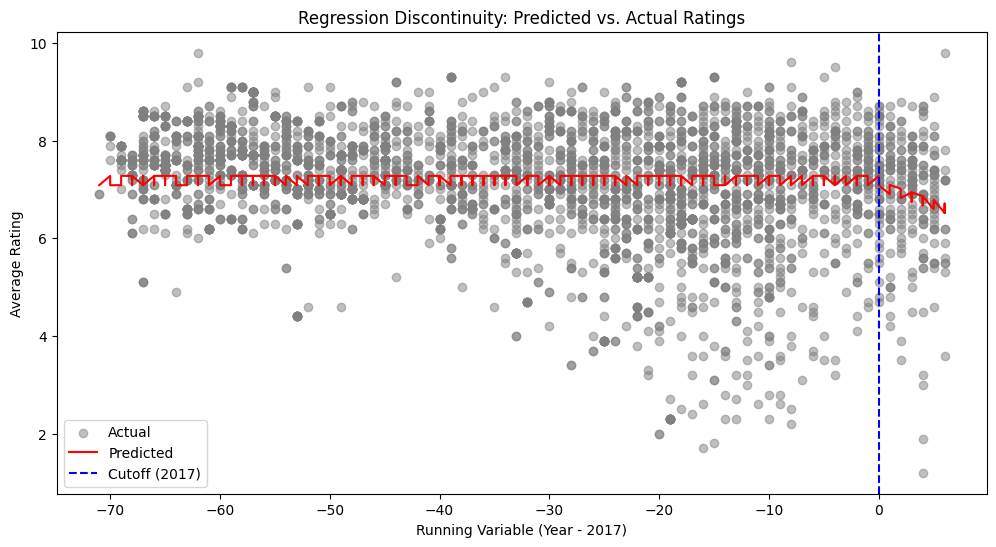

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
merged_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = merged_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# MODEL WITH CONTROLS

In [ ]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
merged_df['running_variable'] = merged_df['startYear'] - 2017

# Interaction term
merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']

# Selecting relevant columns
X = merged_df[['is_after_2017', 'interaction', 'isAdult', 'is_actress', 'runtimeMinutes', 'numVotes', 'birthYear', 'is_action',
                   'is_romance', 'is_scifi', 'is_drama', 'is_comedy', 'is_adventure', 'is_documentary', 'is_fantasy',
              'is_history', 'is_horror', 'is_biography']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = merged_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     43.18
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          5.35e-140
Time:                        11:41:26   Log-Likelihood:                -6018.6
No. Observations:                4204   AIC:                         1.208e+04
Df Residuals:                    4185   BIC:                         1.220e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.1614      1.026     24.

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/3803041859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['running_variable'] = merged_df['startYear'] - 2017
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/3803041859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']


In [ ]:
#merged_df = merged_df[(merged_df['startYear'] >= 2000) & (merged_df['startYear'] <= 2023)]

In [ ]:
# GRAPH WITH CONTROLS

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_52955/2858178583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_rating'] = model.predict(X)


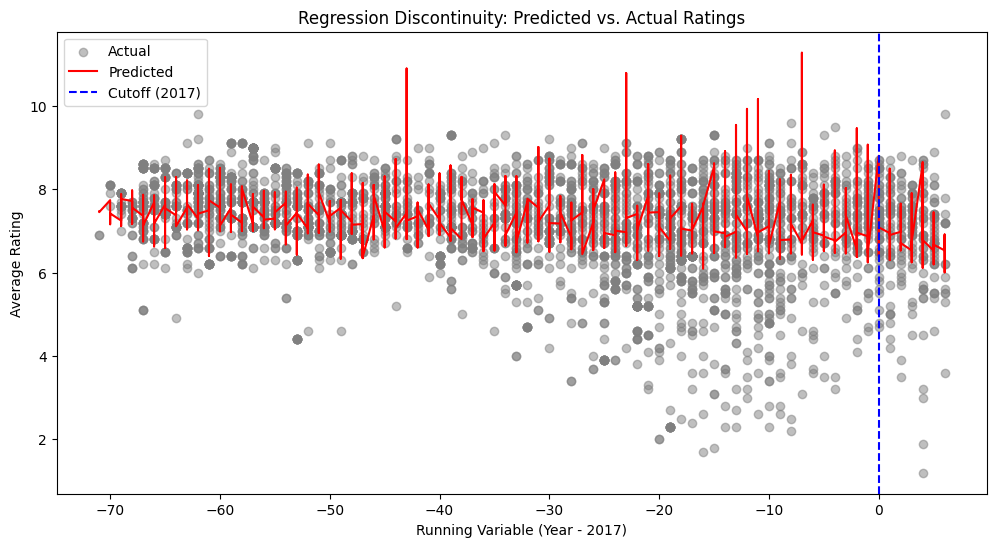

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
merged_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = merged_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
female_lead_df = merged_df[merged_df['is_actress'] == 1]
female_lead_df = female_lead_df[(female_lead_df['startYear'] >= 2000) & (female_lead_df['startYear'] <= 2023)]
female_lead_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,is_actress,tconst,titleType,primaryTitle,...,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography,running_variable,interaction,predicted_rating
897,nm9205938,McKenna Grace Martin,1998.0,2018,actress,tt5618256,1,tt5618256,tvSeries,Manhunt,...,0,0,0,0,0,0,1,0.0,0.0,7.087893
54255,nm0252363,Katarina Ekholm,1991.0,\N,actress,tt0254044,1,tt0254044,tvSeries,Ronny & Julia,...,1,0,0,0,0,0,0,-17.0,-0.0,6.892583
176683,nm1801760,Chantal Vandenberg,1975.0,\N,actress,tt0243082,1,tt0243082,tvSeries,Popstars,...,0,0,0,0,0,0,0,-17.0,-0.0,6.737360
185496,nm0071687,Courtney Bennett,1982.0,\N,"actress,editorial_department",tt0282332,1,tt0282332,tvSeries,Texas Justice,...,0,0,0,0,0,0,0,-16.0,-0.0,6.672051
203874,nm2535537,Marya Pirak,1984.0,\N,actress,tt0810788,1,tt0810788,tvSeries,Burn Notice,...,0,0,0,0,0,0,0,-10.0,-0.0,7.234749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954420,nm9261157,Rei Ishigami,1997.0,\N,actress,tt6842116,1,tt6842116,tvSeries,Ultraman Geed,...,1,1,0,0,0,0,0,0.0,0.0,6.877696
4006858,nm9783089,Gabriela Arroyo,1984.0,\N,actress,tt6645602,1,tt6645602,tvSeries,Perdona Nuestros Pecados,...,0,0,0,0,0,0,0,0.0,0.0,6.842593
4014352,nm9900054,Anastasiya Aleksandrova,1988.0,\N,actress,tt4482996,1,tt4482996,tvSeries,Zakon kamennykh dzhungley,...,0,0,0,0,0,0,0,-2.0,-0.0,6.800362
4014353,nm9900056,Lyubov Prokopyeva,1990.0,\N,actress,tt4482996,1,tt4482996,tvSeries,Zakon kamennykh dzhungley,...,0,0,0,0,0,0,0,-2.0,-0.0,6.781733


In [ ]:
# Check for missing values
print(female_lead_df.isnull().sum())

# Option 1: Drop rows with missing values
female_lead_df = female_lead_df.dropna()

# Option 2: Fill missing values, e.g., with the mean or median
#female_lead_df = female_lead_df.fillna(female_lead_df.mean())


nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
is_actress           0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
directors            0
writers              0
averageRating        0
numVotes             0
is_after_2017        0
is_action            0
is_drama             0
is_romance           0
is_scifi             0
is_comedy            0
is_adventure         0
is_documentary       0
is_fantasy           0
is_history           0
is_horror            0
is_biography         0
running_variable     0
interaction          0
predicted_rating     0
dtype: int64


In [ ]:
# Check for infinite values
print(female_lead_df.isin([np.inf, -np.inf]).sum())

# Replace infinite values with NaN and then handle NaNs as above
female_lead_df = female_lead_df.replace([np.inf, -np.inf], np.nan)


nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
is_actress           0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
directors            0
writers              0
averageRating        0
numVotes             0
is_after_2017        0
is_action            0
is_drama             0
is_romance           0
is_scifi             0
is_comedy            0
is_adventure         0
is_documentary       0
is_fantasy           0
is_history           0
is_horror            0
is_biography         0
running_variable     0
interaction          0
predicted_rating     0
dtype: int64


In [ ]:
# FEMALE WITHOUT CONTROLS

In [ ]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
female_lead_df['running_variable'] = female_lead_df['startYear'] - 2017

# Interaction term
female_lead_df['interaction'] = female_lead_df['running_variable'] * female_lead_df['is_after_2017']

# Selecting relevant columns
X = female_lead_df[['is_after_2017', 'interaction']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = female_lead_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.270
Date:                Mon, 27 Nov 2023   Prob (F-statistic):             0.0146
Time:                        11:41:26   Log-Likelihood:                -729.52
No. Observations:                 451   AIC:                             1465.
Df Residuals:                     448   BIC:                             1477.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9142      0.063    109.117

In [ ]:
# GRAPH FEMALE WITHOUT CONTROLS

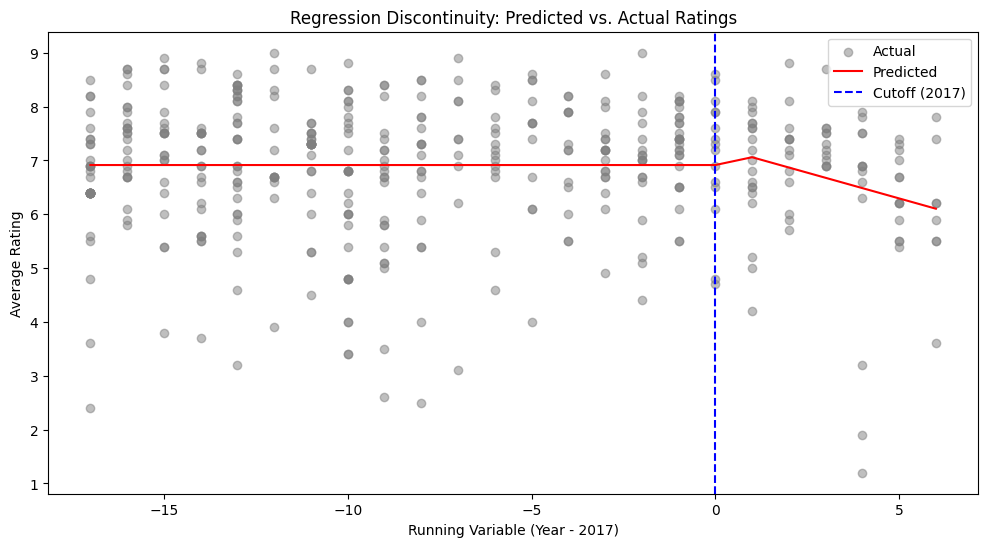

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# FEMALE WITH CONTROLS

In [ ]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
female_lead_df['running_variable'] = female_lead_df['startYear'] - 2017

# Interaction term
female_lead_df['interaction'] = female_lead_df['running_variable'] * female_lead_df['is_after_2017']

# Selecting relevant columns
X = female_lead_df[['is_after_2017', 'interaction', 'isAdult', 'runtimeMinutes', 'numVotes', 'birthYear', 'is_action',
                   'is_romance', 'is_scifi', 'is_drama', 'is_comedy', 'is_adventure', 'is_documentary', 'is_fantasy',
              'is_history', 'is_horror', 'is_biography']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = female_lead_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.232
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           4.16e-13
Time:                        11:41:26   Log-Likelihood:                -684.42
No. Observations:                 451   AIC:                             1405.
Df Residuals:                     433   BIC:                             1479.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5187      7.296      1.

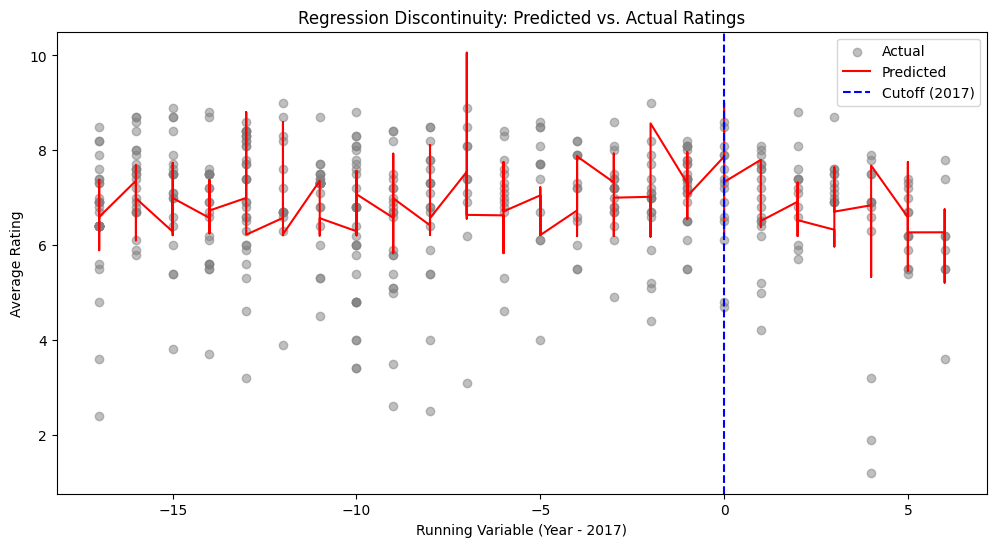

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# WIGGLY COOL, BUT BIG

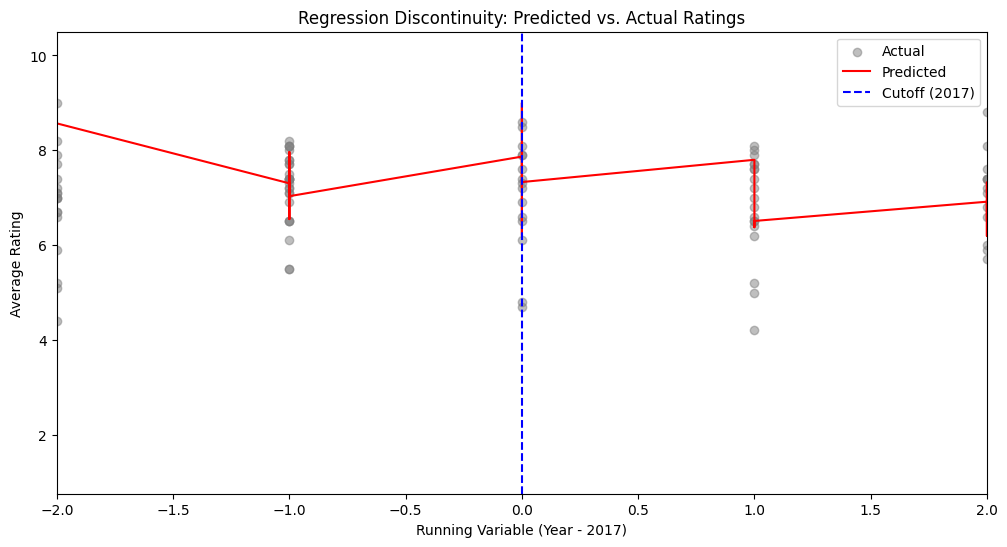

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Set limit
plt.xlim(-2, 2)

# Show the plot
plt.show()


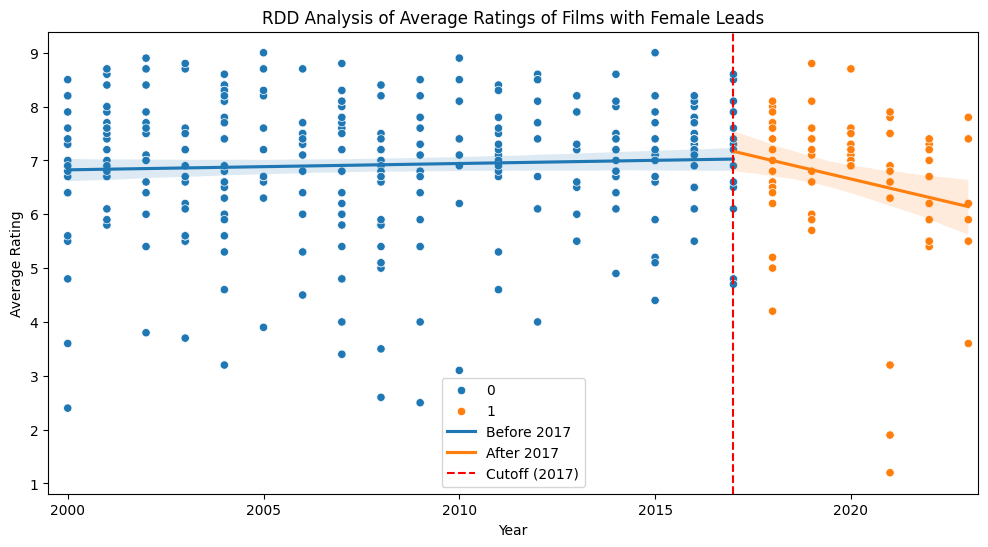

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='startYear', y='averageRating', data=female_lead_df, hue='is_after_2017')

# Separate the data into before and after the cutoff
before_cutoff = female_lead_df[female_lead_df['is_after_2017'] == 0]
#after_cutoff = female_lead_df[female_lead_df['is_after_2017'] == 1]
#before_cutoff = filtered_df[filtered_df['startYear'] <= 2017]
after_cutoff = female_lead_df[female_lead_df['startYear'] >= 2017]

# Fit and plot a linear regression for data before the cutoff
sns.regplot(x='startYear', y='averageRating', data=before_cutoff, scatter=False, label='Before 2017')

# Fit and plot a linear regression for data after the cutoff
sns.regplot(x='startYear', y='averageRating', data=after_cutoff, scatter=False, label='After 2017')

# Cutoff line at 2017
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff (2017)')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads')
plt.legend()

# Set limit
plt.xlim(1999.5, 2023.25)

# Show plot
plt.show()


In [ ]:
#before_cutoff

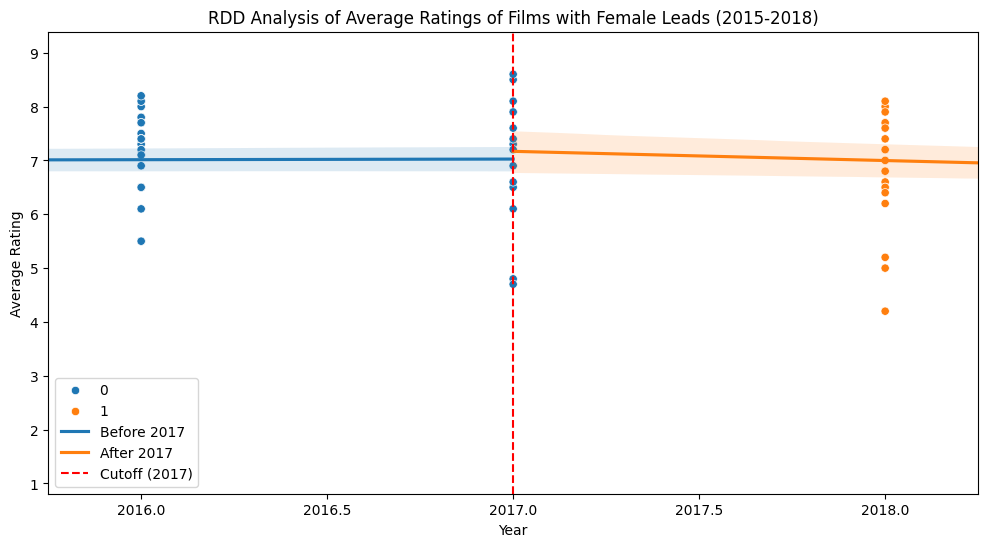

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the years 2015 to 2020
filtered_df = female_lead_df[(female_lead_df['startYear'] >= 2000) & (female_lead_df['startYear'] <= 2023)]

# Scatter plot of the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='startYear', y='averageRating', data=filtered_df, hue='is_after_2017')

# Separate the filtered data into before and after the cutoff
before_cutoff = filtered_df[filtered_df['startYear'] <= 2017]
after_cutoff = filtered_df[filtered_df['startYear'] >= 2017]

# Fit and plot a linear regression for filtered data before the cutoff
sns.regplot(x='startYear', y='averageRating', data=before_cutoff, scatter=False, label='Before 2017')

# Fit and plot a linear regression for filtered data after the cutoff
sns.regplot(x='startYear', y='averageRating', data=after_cutoff, scatter=False, label='After 2017')

# Cutoff line at 2017
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff (2017)')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads (2015-2018)')
plt.legend()

# Set the x-axis limits to 2015-2020
plt.xlim(2015.75, 2018.25)

# Show plot
plt.show()


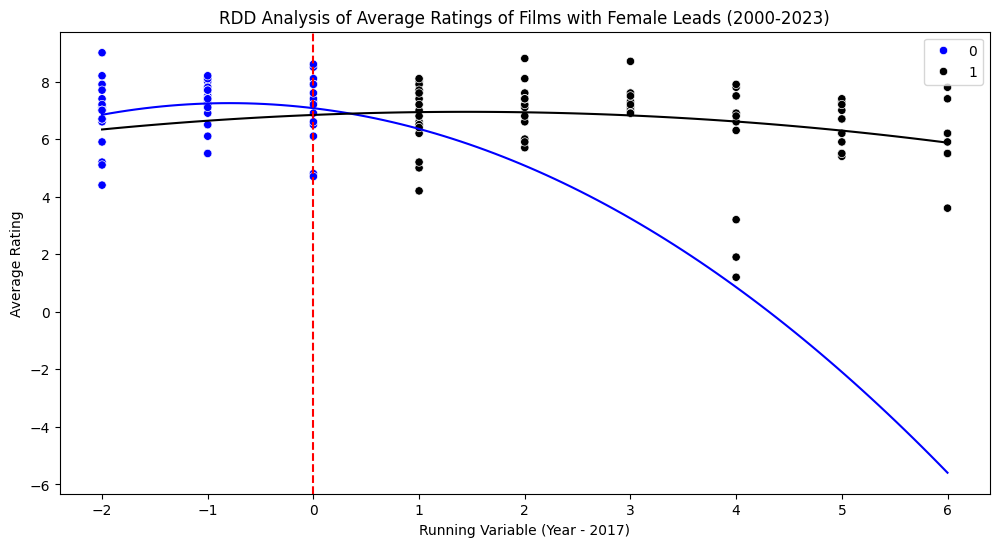

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame for the years 2000 to 2023
filtered_df = female_lead_df[(female_lead_df['startYear'] >= 2015) & (female_lead_df['startYear'] <= 2023)]

# Scatter plot of the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='running_variable', y='averageRating', data=filtered_df, hue='is_after_2017', palette=['blue', 'black'])

# Fit a polynomial regression for data before the cutoff
before_cutoff = filtered_df[filtered_df['is_after_2017'] == 0]
z_before = np.polyfit(before_cutoff['running_variable'], before_cutoff['averageRating'], deg=2)
p_before = np.poly1d(z_before)

# Fit a polynomial regression for data after the cutoff
after_cutoff = filtered_df[filtered_df['is_after_2017'] == 1]
z_after = np.polyfit(after_cutoff['running_variable'], after_cutoff['averageRating'], deg=2)
p_after = np.poly1d(z_after)

# Generate a range of values for the running variable
x_range = np.linspace(filtered_df['running_variable'].min(), filtered_df['running_variable'].max(), 100)

# Plot the polynomial regression lines
plt.plot(x_range, p_before(x_range), color='blue', linestyle='-')
plt.plot(x_range, p_after(x_range), color='black', linestyle='-')

# Cutoff line at 0 (since running_variable is relative to the cutoff)
plt.axvline(x=0, color='red', linestyle='--')

# Labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads (2000-2023)')
plt.legend()

# Show plot
plt.show()
